In [ ]:
import tensorflow as tf

In [ ]:
m = 2 # slope
b = 1 # intersect

In [ ]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_train1 = np.random.uniform(-1, 1,500)
x_train2 = np.random.uniform(-1, 1, 500)

x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # questi sono gli 'ouput ideali', ovvero i valori veri da cui calcolare anche la loss
# da notare che questa serie di valori è calcolata solo per il set di validazione.

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

sigma1 = 0.1 # noise standard deviation, for the moment it is absent
y_train1 = np.random.normal(m * x_train1 + b, sigma1) # actual measures from which we want to guess regression parameters
y_valid1 = np.random.normal(m * x_valid + b, sigma1)

sigma2 = 0.2 # noise standard deviation, for the moment it is absent
y_train2 = np.random.normal(m * x_train2 + b, sigma2) # actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(m * x_valid + b, sigma2)

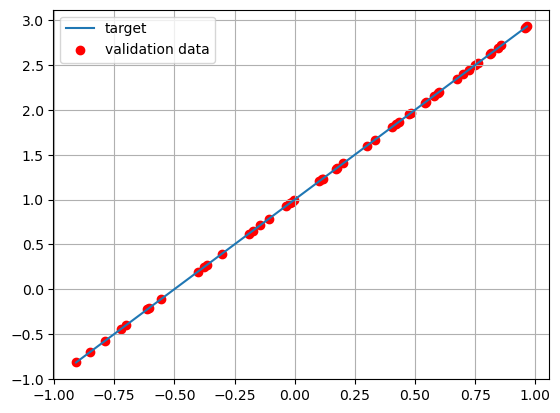

In [ ]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) # add serve per aggiungere un layer, dense vuol dire che tutti i neuroni sono collegati a tutti i neuroni, l'uni vuol dire che abbiamo un
#layer con un singolo neurone , input_shape sarebbe quante sono le varibili di partenza

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) # optimizer: algorutnìmo che gioca sui parametri da cui dipende il modello, e tenta di minimizzare la loss
#l'algoritmo usato è quello della back propagation

/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse' , metrics=['mse'])
    return model

# Modello 1
model1 = create_model()


# Modello 2
model2 = create_model()


In [ ]:
# get a summary of our composed model
model.summary()


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callback che salva i pesi alla fine di ogni epoca
from tensorflow.keras.callbacks import LambdaCallback

weights_per_epoch = []

save_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: weights_per_epoch.append(model.get_weights()[0].copy()))


# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
# 
history = model.fit(x=x_train, y=y_train, 
          verbose=0, batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

history1 = model1.fit(x=x_train1, y=y_train1, 
          verbose=0, batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid1))

history2 = model2.fit(x=x_train2, y=y_train2, 
          verbose=0, batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid2))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.9659 - mse: 2.9659 - val_loss: 2.6356 - val_mse: 2.6356
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1382 - mse: 2.1382 - val_loss: 1.8944 - val_mse: 1.8944
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6044 - mse: 1.6044 - val_loss: 1.3976 - val_mse: 1.3976
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1069 - mse: 1.1069 - val_loss: 1.0464 - val_mse: 1.0464
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8766 - mse: 0.8766 - val_loss: 0.7972 - val_mse: 0.7972
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7120 - mse: 0.7120 - val_loss: 0.6131 - val_mse: 0.6131
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5237 - mse: 0.5237 - val_loss: 0.4793 - val_mse: 0.4793
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4381 - mse: 0.4381 - val_loss: 0.3757 - val_mse: 0.3757
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3414 - mse:

In [ ]:
model.get_weights()
model1.get_weights()
model2.get_weights()

[array([[1.9661125]], dtype=float32), array([0.9948312], dtype=float32)]

In [ ]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score1 = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=1)
score2 = model2.evaluate(x_valid, y_valid2, batch_size=32, verbose=1)



# print performance
print()
print('Test_0 loss:', score[0])
print('Test_0 accuracy:', score[1])

print('Test_01 loss:', score1[0])
print('Test_01 accuracy:', score1[1])

print('Test_02 loss:', score2[0])
print('Test_02 accuracy:', score2[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.0505e-05 - mse: 3.0505e-05
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0145 - mse: 0.0145
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0320 - mse: 0.0320

Test_0 loss: 3.570277476683259e-05
Test_0 accuracy: 3.57027784048114e-05
Test_01 loss: 0.014919573441147804
Test_01 accuracy: 0.014919573441147804
Test_02 loss: 0.030781373381614685
Test_02 accuracy: 0.030781373381614685


In [ ]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.0505e-05 - mse: 3.0505e-05

Test loss: 3.570277476683259e-05
Test accuracy: 3.57027784048114e-05


In [ ]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# in questo caso se sigma è 0 i risultati saranno uguali, perchè i valori di target sono i
# medesimi di quelli di validazione per y

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.0505e-05 - mse: 3.0505e-05

Test loss: 3.570277476683259e-05
Test accuracy: 3.57027784048114e-05


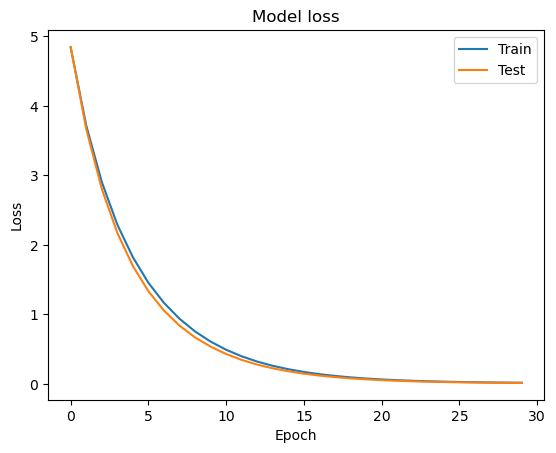

In [ ]:
# look into training history
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
#iterazione sulle epoche

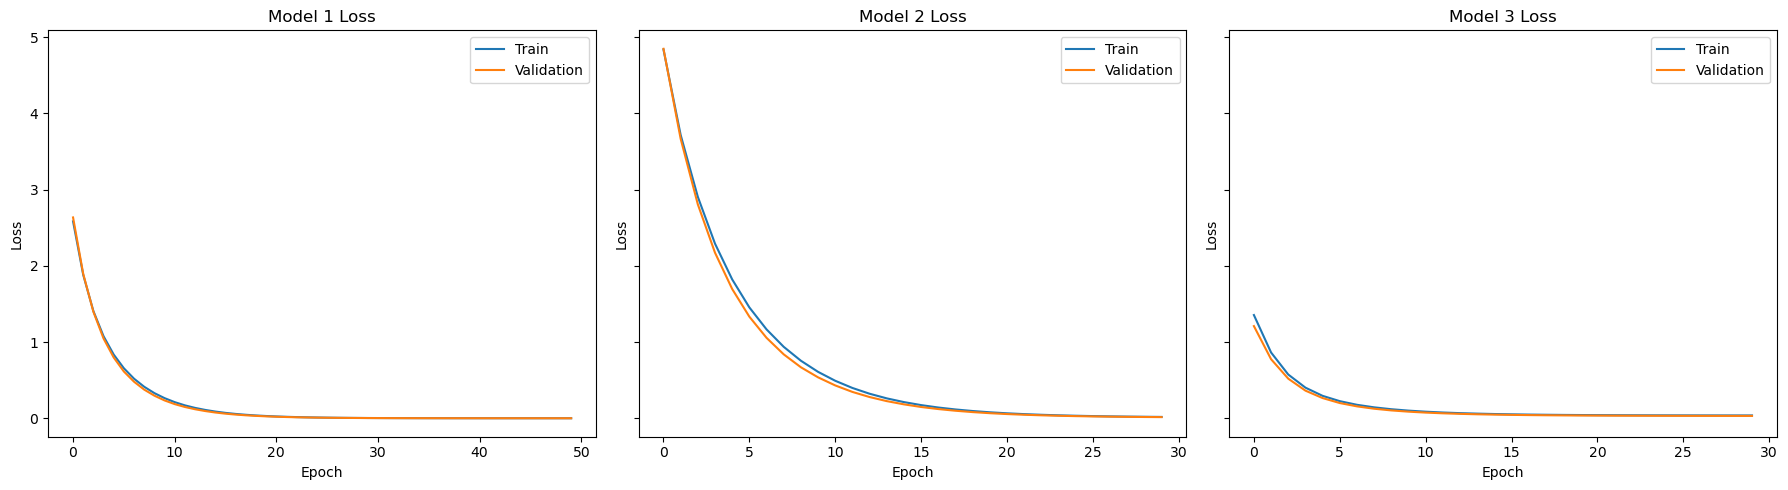

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey= True)  # 1 row, 3 columns

# Lista delle history e titoli
histories = [history ,history1, history2 ] # il primo contiene i dati con una varianza nulla, il secondo e il terzo rispettivamente di 0.1 e 0.2
titles = ['Model 1 Loss', 'Model 2 Loss', 'Model 3 Loss']

# Itera sui 3 grafici
for i in range(3):
    ax = axes[i]
    ax.plot(histories[i].history['loss'])
    ax.plot(histories[i].history['val_loss'])
    ax.set_title(titles[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    #ax.set_ylim(0, 3)  # Imposta stesso intervallo Y

    ax.legend(['Train', 'Validation'], loc='best')

plt.tight_layout()
plt.show()
#come cambia il fit se cambio il rumore dei dati di training e di validazione

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/stepWARNING:tensorflow:5 out of the last 57 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x798c70fcfeb0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


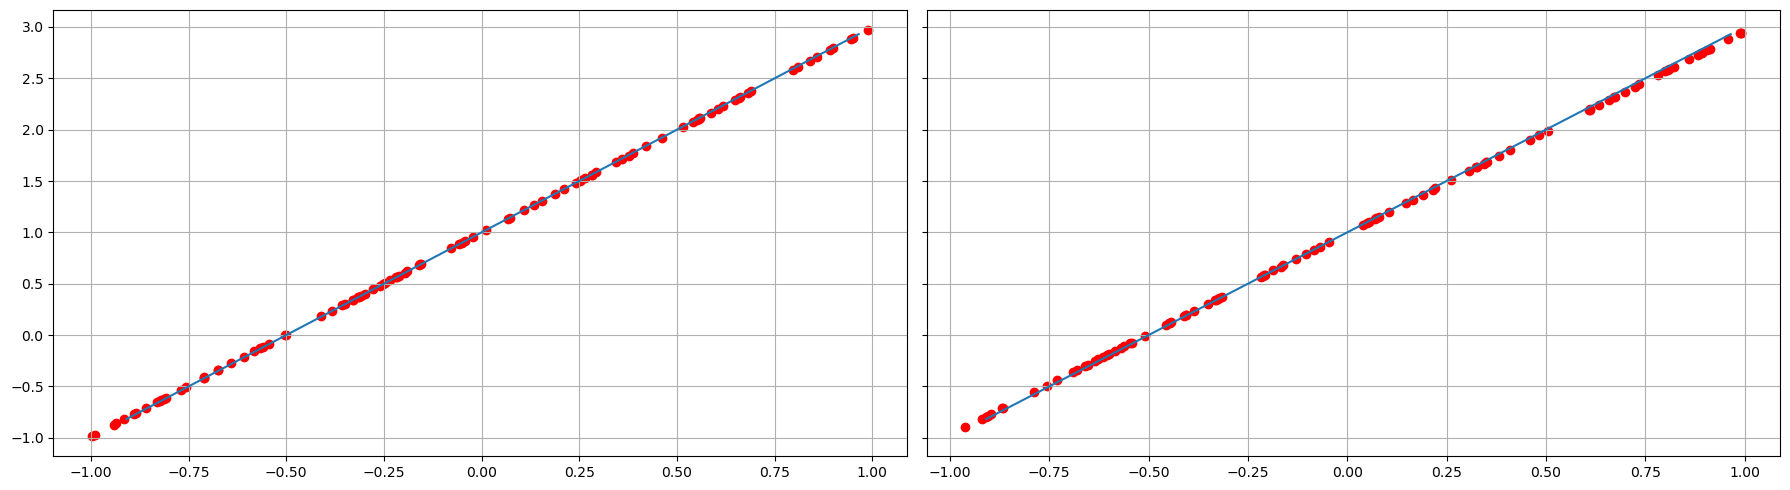

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18, 5), sharey= True)  # 1 row, 3 columns

models= [model, model2]
for i in range(2):
    ax = axes[i]
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = models[i].predict(x_predicted)
    ax.scatter(x_predicted, y_predicted,color='r')
    ax.plot(x_valid, y_target)
    ax.grid(True)
plt.tight_layout()
plt.show()

## ESERCIZIO 11.2


In [ ]:
%reset -f

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def func(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = func(x_valid) # ideal (target) linear function

sigma = 0.4 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(func(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(func(x_valid) , sigma)

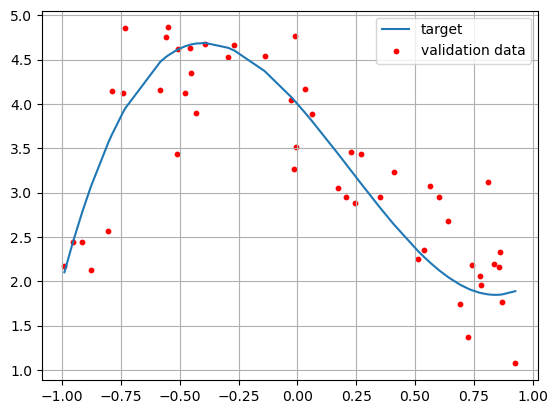

In [ ]:
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data', s=10)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1000,)
(1000,)


In [ ]:
ep= 100
n_neurons= 30
history=[]
actf = ['relu', 'tanh', 'gelu', 'sigmoid', 'selu', 'softmax', 'swish', 'exponential']
models=[]

from tensorflow.keras.optimizers import Adam


score = []  

for i in range(len(actf)) :   
    
    # Crea un nuovo modello a ogni ciclo
    model = Sequential()
    model.add(Dense(40, input_shape=(1,), activation=actf[i]))
    model.add(Dense(20, activation=actf[i]))
    model.add(Dense(1))  # output layer lineare
    
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

    models.append(model)
    
    history.append(model.fit(
        x=x_train, y=y_train, 
        batch_size=32, epochs=ep,
        shuffle=True, validation_data=(x_valid, y_valid),
        verbose=0  # silenzioso
    ))

    score.append(model.evaluate(x_valid, y_valid, batch_size=32, verbose=0))
    print(f"Epoche: {ep},  Validation Loss: {score[i][0]:.4f}, Modello con activation function: {actf[i]}")

    # incrementa parametri
    



/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoche: 100,  Validation Loss: 0.2508, Modello con activation function: relu
Epoche: 100,  Validation Loss: 0.2599, Modello con activation function: tanh
Epoche: 100,  Validation Loss: 0.2640, Modello con activation function: gelu
Epoche: 100,  Validation Loss: 0.2584, Modello con activation function: sigmoid
Epoche: 100,  Validation Loss: 0.2595, Modello con activation function: selu
Epoche: 100,  Validation Loss: 0.2528, Modello con activation function: softmax
Epoche: 100,  Validation Loss: 0.2627, Modello con activation function: swish
Epoche: 100,  Validation Loss: 0.3529, Modello con activation function: exponential


In [ ]:
scores = {}
for i in range(len(actf)):
    print("Model with activation function: {c} , {actf}".format( c= i, actf=actf[i]))
    w = models[i].get_weights()

    score = models[i].evaluate(x_valid, y_valid, batch_size = 32, verbose = 0)
    print('Test loss:\t\t', score[0])
    print('Test accuracy:\t\t', score[1])

    score = models[i].evaluate(x_valid, y_target, batch_size = 32, verbose = 0)
    print('Test loss exact:\t', score[0])
    print('Test accuracy exact:\t', score[1])

    

Model with activation function: 0 , relu
Test loss:		 0.250821977853775
Test accuracy:		 0.250821977853775
Test loss exact:	 0.011922537349164486
Test accuracy exact:	 0.011922537349164486
Model with activation function: 1 , tanh
Test loss:		 0.2599180042743683
Test accuracy:		 0.2599180042743683
Test loss exact:	 0.005706452764570713
Test accuracy exact:	 0.005706452764570713
Model with activation function: 2 , gelu
Test loss:		 0.26402905583381653
Test accuracy:		 0.26402905583381653
Test loss exact:	 0.0021812543272972107
Test accuracy exact:	 0.0021812543272972107
Model with activation function: 3 , sigmoid
Test loss:		 0.2583790123462677
Test accuracy:		 0.2583790123462677
Test loss exact:	 0.006797567009925842
Test accuracy exact:	 0.006797567009925842
Model with activation function: 4 , selu
Test loss:		 0.2595224976539612
Test accuracy:		 0.2595224976539612
Test loss exact:	 0.006201510317623615
Test accuracy exact:	 0.006201510317623615
Model with activation function: 5 , soft

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


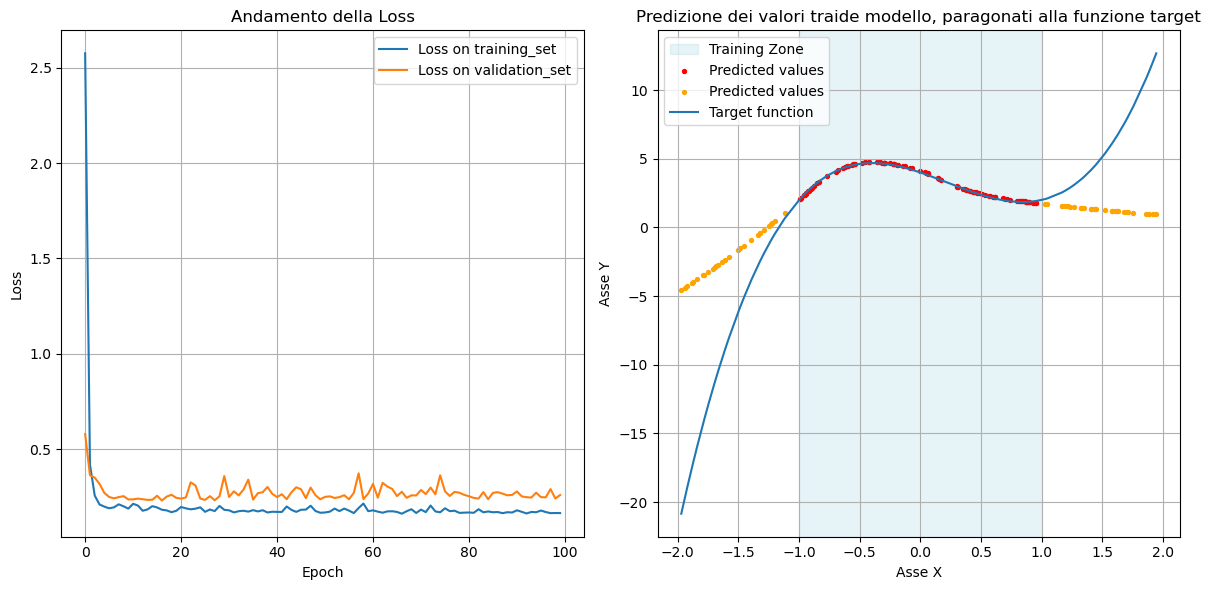

In [ ]:
selected= 4

#plt.plot(history[selected].history['loss'])
#plt.plot(history[selected].history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='best')
#plt.show()

fig, axes = plt.subplots(1,2, figsize=(12, 6))  # 1 row, 3 columns

#PRIMO PLOT
ax = axes[0]
ax.set_title(f"Andamento della Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.plot(history[selected].history['loss'], label ='Loss on training_set')
ax.plot(history[selected].history['val_loss'], label ='Loss on validation_set')
ax.legend()
ax.grid()

#SECONDO PLOT
ax2 = axes[1]
x_predicted = np.random.uniform(-1, 1, 100)
x_out = np.concatenate([np.random.uniform(-2, -1, 30), np.random.uniform(1, 2, 30)])
x_tot= np.concatenate([ x_predicted, x_out])
x_tot.sort()
y_predicted = models[selected].predict(x_predicted)

y_target_tot = func(x_tot)
y_out = models[selected].predict(x_out)
ax2.set_title(f"Predizione dei valori traide modello, paragonati alla funzione target")
ax2.set_xlabel("Asse X")
ax2.set_ylabel("Asse Y")
ax2.axvspan(-1, 1, color='lightblue', alpha=0.3, label='Training Zone')
ax2.scatter(x_predicted, y_predicted,color='r', s=8 , label = 'Predicted values')
ax2.scatter(x_out, y_out ,color='orange', s=8 , label='Predicted values')
ax2.plot(x_tot, y_target_tot ,  label='Target function')
ax2.grid(True)
ax2.legend()


plt.tight_layout()
plt.show()
